# UGIC Presentation - Erik Neemann, Utah AGRC
## Putting Pandas to Work:
### Solving GIS Problems in Python
This Python Notebook accompanies the UGIC 2020 Presentation that can be found  [here on Youtube](https://www.youtube.com/watch?v=Y14Tg9SdXV0).


## References

Following Python libraries will be used in this tutorial:
*  [Pandas](https://pandas.pydata.org/) - The primary focus of this this demonstration ([@pandas_dev](https://twitter.com/pandas_dev))
*  [GeoPandas](https://geopandas.org/) - An open source Python project for working with geospatial data ([@geopandas](https://twitter.com/geopandas))
  * Extends the Pandas library to geospatial data
  * Installation help can be found [here](https://geopandas.org/install.html)
*  [Psycopg2](https://www.psycopg.org/) - A PostgreSQL/PostGIS client for Python, used to access geospatial data
* [Matplotlib](https://matplotlib.org/) - A plotting and visualization library for Python
* [NumPy](https://numpy.org/) - A fundamental package for scientific computing in Python



## A Plug for the Open SGID
The introduction of the [Open SGID](https://gis.utah.gov/introducing-open-sgid/) has opened the door for new ways to explore Utah's GIS data.  Before the Open SGID, a user would typically have gone to the AGRC web page to find the data they were looking for and download it in shapefile or file geodatabase format. This can still be done today, but now that AGRC has leveraged the [Open Data](https://opendata.gis.utah.gov/) platform, there are more options for users to access geospatial data in their preferred way. Data can now be streamed into a GIS client via web services or can be downloaded in even more formats (e.g., GeoJSON, KML, and CSV). But the recently launched Open SGID is an especially valuable resource because it is a cloud-hosted PostgreSQL PostGIS database that anyone can connect to. As the Open SGID has nightly automated updates, tapping into the Open SGID means you'll have a living connection to the freshest SGID data available.

The Open SGID also creates an opportunity for users to pull in data and perform analysis using only open source Python libraries. With this route, you don't need to worry about paying for licensed software or even installing GIS desktop software at all. And if you use a cloud-hosted Jupyter notebook—like Google Colab—you don't even have to install Python on your computer (or tablet or chromebook)!




## Import Needed Python Libraries
In the first couple of cells, we import the needed libraries so they can be used later in the demonstration).

In [1]:
import geopandas as gpd
import pandas as pd
import psycopg2
import numpy as np
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Data creation and reading in data

In [ ]:
# Create data from scratch
df = pd.DataFrame({'A': [1,2,3], 'B': [4,5,6], 'C': [7,8,9]})
df.head()

,A,B,C
0,1,4,7
1,2,5,8
2,3,6,9


In [ ]:
# Read data from CSV
csv = pd.read_csv(r'C:\COVID19\COVID_Case_Counts_latest.csv')
csv.head(15)

,Jurisdiction,Cases,Hospitalizations,Deaths
0,Bear River,62,10,1
1,Central Utah,25,2,0
2,Davis County,299,24,2
3,Salt Lake County,2769,251,31
4,San Juan,116,12,2
5,Southeast Utah,11,0,0
6,Southwest Utah,119,13,2
7,Summit County,377,33,0
8,Tooele County,71,6,0
9,TriCounty,14,1,0


In [ ]:
# Read data from Excel
excel = pd.read_excel(r'C:\E911\StGeorgeDispatch\Street_data_20200218.xlsx')
excel.head()

,STREET,CITYCD,BEG,END,Y START,X START,Y END,X END
0,E TANOAK DR,STG,3055,3190,37.048661,-113.520661,37.049286,-113.517907
1,E TANOAK CIR,STG,3054,3021,37.048641,-113.521491,37.048661,-113.520661
2,BOONE PARK CIR,SAN,1423,1495,37.135281,-113.670061,37.133161,-113.670091
3,E DESERT CANYONS PKWY,STG,3661,3891,37.005375,-113.508266,37.006641,-113.503571
4,N RIMVIEW DR,STG,1886,1906,37.155245,-113.463212,37.156831,-113.463281


,OBJECTID,NAME,TYPE,ADDRESS,CITY,ZIP5,COUNTY,FIPS,PARCEL_ID,SRC_YEAR,FORKLIFT_H,Shape__Are,Shape__Len,dsm,dtm,diff,height_ft,geometry
0,163682,None,structure likely,267 W 2400 S,Bountiful,84010,DAVIS,49011,050260023,2018,35468a44d134dafc,335.640625,75.384525,1371.502002,1367.971196,3.530806,11.584008,"POLYGON ((425228.663 4523969.356, 425246.273 4..."
1,478872,None,structure likely,2443 S 200 W,Bountiful,84010,DAVIS,49011,051090117,2018,6f28910e88a3464a,399.968750,80.073804,1376.941187,1374.178794,2.762393,9.062968,"POLYGON ((425385.383 4523956.786, 425370.893 4..."
2,861539,None,structure likely,2420 S 150 W,Bountiful,84010,DAVIS,49011,051090115,2018,6cdb83b0577fa8a8,454.343750,85.860992,1383.906006,1375.904805,8.001201,26.250661,"POLYGON ((425398.013 4523971.976, 425398.623 4..."
3,526726,None,structure likely,189 W PENMAN LN,Bountiful,84010,DAVIS,49011,051090116,2018,e54846333065d906,495.710938,94.006291,1378.526802,1374.586396,3.940405,12.927839,"POLYGON ((425371.633 4523997.216, 425394.863 4..."
4,536331,None,structure likely,143 W PENMAN LN,Bountiful,84010,DAVIS,49011,051090114,2018,8ebcb578d7fa3f2d,396.812500,81.857688,1381.932808,1378.279609,3.653198,11.985559,"POLYGON ((425444.223 4523991.046, 425461.423 4..."


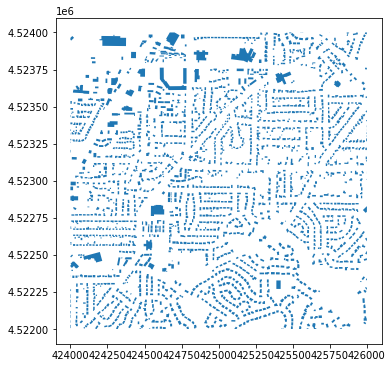

In [ ]:
# Read data from Shapefile
file_path = r'C:\Users\eneemann\Desktop\Lidar\footprints_12TVL2400022000.shp'
shapefile = gpd.read_file(file_path)
shapefile.head()
shapefile.plot(figsize=(10, 6))

,xid,countynbr,name,countyseat,shortdesc,updated,fips,entitynbr,salestaxid,imscolor,minname,poplastcensus,poplastestimate,gnis,shape
0,1,04,Helper,0.0,HELPER CITY,2012-03-08 00:00:00+00:00,34530,3020.0,016,2.0,Helper,2205.0,2091.0,1428654,"MULTIPOLYGON (((511035.610 4393046.500, 510986..."
1,2,18,West Valley City,0.0,WEST VALLEY CITY,2012-02-02 00:00:00+00:00,83470,3120.0,167,3.0,West Valley,133796.0,136401.0,1437843,"MULTIPOLYGON (((418708.940 4508796.860, 418619..."
2,3,03,Richmond,0.0,RICHMOND,2019-09-24 00:00:00+00:00,63680,3150.0,059,2.0,,2498.0,2730.0,1444892,"MULTIPOLYGON (((433217.950 4644220.790, 433215..."
3,4,18,Herriman,0.0,HERRIMAN TOWN,2019-11-22 00:00:00+00:00,34970,3035.0,060,1.0,,22018.0,44877.0,1428675,"MULTIPOLYGON (((410130.590 4481790.900, 409933..."
4,5,13,Orderville,0.0,ORDERVILLE,2012-03-22 00:00:00+00:00,57080,3050.0,007,2.0,,587.0,591.0,1431023,"MULTIPOLYGON (((349814.290 4120868.480, 349904..."


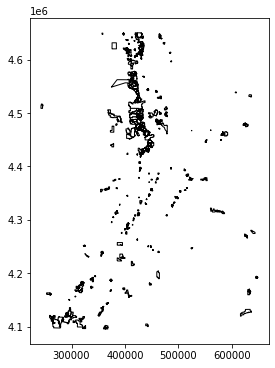

In [ ]:
# Read data from PostGIS
# Postgres database connection information
con = psycopg2.connect(database="opensgid", user="agrc", password="agrc",
    host="opensgid.agrc.utah.gov")

# Simple query to grab and plot Utah municipalities
sql_muni = "select * from opensgid.boundaries.municipal_boundaries"
munis = gpd.GeoDataFrame.from_postgis(sql_muni, con, geom_col='shape')

munis.head()
munis.plot(figsize=(10, 6), color='white', edgecolor='black')

## Viewing data and properties

In [ ]:
# Demonstrate functionality using municipal boundaries read from PostGIS
munis.shape

(253, 15)

In [ ]:
munis.sort_values('name', inplace=True)
munis.head(3)

,xid,countynbr,name,countyseat,shortdesc,updated,fips,entitynbr,salestaxid,imscolor,minname,poplastcensus,poplastestimate,gnis,shape
90,91,25,Alpine,0.0,ALPINE,2017-09-01 00:00:00+00:00,00540,3010.0,001,4.0,,9945.0,10504.0,1438174,"MULTIPOLYGON (((436045.050 4481253.500, 436044..."
106,107,18,Alta,0.0,ALTA,NaT,00650,3010.0,003,3.0,,384.0,383.0,1437483,"MULTIPOLYGON (((449264.000 4492021.700, 449275..."
91,92,07,Altamont,0.0,ALTAMONT,2010-08-23 00:00:00+00:00,00760,3010.0,001,1.0,,237.0,246.0,1425096,"MULTIPOLYGON (((560735.730 4468288.510, 560334..."


In [ ]:
munis.tail(9)

,xid,countynbr,name,countyseat,shortdesc,updated,fips,entitynbr,salestaxid,imscolor,minname,poplastcensus,poplastestimate,gnis,shape
66,67,06,West Bountiful,0.0,WEST BOUNTIFUL,2019-02-15 00:00:00+00:00,82840,3130.0,061,2.0,,5420.0,5731.0,1447113,"MULTIPOLYGON (((422476.300 4528227.300, 422476..."
161,162,29,West Haven,0.0,WEST HAVEN,2020-05-01 00:00:00+00:00,82930,3130.0,051,3.0,,10433.0,15239.0,1455859,"MULTIPOLYGON (((410771.980 4561787.970, 410770..."
117,118,18,West Jordan,0.0,WEST JORDAN CITY,2014-09-15 00:00:00+00:00,82950,3110.0,155,2.0,,105891.0,116046.0,1434086,"MULTIPOLYGON (((415038.790 4499131.160, 415038..."
212,213,06,West Point,0.0,WEST POINT,NaT,83390,3140.0,056,1.0,,9784.0,10753.0,1434108,"MULTIPOLYGON (((407035.700 4555298.600, 407035..."
1,2,18,West Valley City,0.0,WEST VALLEY CITY,2012-02-02 00:00:00+00:00,83470,3120.0,167,3.0,West Valley,133796.0,136401.0,1437843,"MULTIPOLYGON (((418708.940 4508796.860, 418619..."
168,169,02,Willard,0.0,WILLARD CITY,2016-11-18 00:00:00+00:00,84710,3160.0,120,1.0,,1799.0,1914.0,1447372,"MULTIPOLYGON (((413890.770 4582726.080, 413903..."
211,212,25,Woodland Hills,0.0,WOODLAND HILLS,NaT,85050,3200.0,125,3.0,,1399.0,1567.0,1455585,"MULTIPOLYGON (((443806.470 4431231.520, 443805..."
229,230,17,Woodruff,0.0,WOODRUFF,2017-11-17 00:00:00+00:00,85260,3040.0,010,4.0,Woodruff,185.0,212.0,1434462,"MULTIPOLYGON (((485447.190 4596959.060, 485468..."
87,88,06,Woods Cross,0.0,WOODS CROSS CITY,2015-05-29 00:00:00+00:00,85370,3150.0,057,4.0,,10086.0,11328.0,1447521,"MULTIPOLYGON (((424779.700 4524289.100, 424787..."


In [ ]:
munis.dtypes

xid                              int64
countynbr                       object
name                            object
countyseat                     float64
shortdesc                       object
updated            datetime64[ns, UTC]
fips                            object
entitynbr                      float64
salestaxid                      object
imscolor                       float64
minname                         object
poplastcensus                  float64
poplastestimate                float64
gnis                            object
shape                         geometry
dtype: object

In [ ]:
munis.columns

Index(['xid', 'countynbr', 'name', 'countyseat', 'shortdesc', 'updated',
       'fips', 'entitynbr', 'salestaxid', 'imscolor', 'minname',
       'poplastcensus', 'poplastestimate', 'gnis', 'shape'],
      dtype='object')

In [ ]:
munis.describe()

,xid,countyseat,entitynbr,imscolor,poplastcensus,poplastestimate
count,253.000000,253.000000,253.000000,253.000000,252.000000,253.000000
mean,127.000000,0.114625,3059.920949,2.498024,10483.111111,11789.241107
std,73.179004,0.319200,44.962084,1.107781,22938.428764,24526.541488
min,1.000000,0.000000,3005.000000,1.000000,0.000000,23.000000
25%,64.000000,0.000000,3022.000000,2.000000,481.250000,490.000000
50%,127.000000,0.000000,3050.000000,3.000000,1650.000000,1691.000000
75%,190.000000,0.000000,3090.000000,3.000000,8334.750000,10217.000000
max,253.000000,1.000000,3200.000000,4.000000,190749.000000,200591.000000


In [ ]:
# Get sorted list of columns and reorganize dataframe columns
col_list = sorted(munis.columns.tolist())
sorted_munis = munis[col_list]
sorted_munis.head()

,countynbr,countyseat,entitynbr,fips,gnis,imscolor,minname,name,poplastcensus,poplastestimate,salestaxid,shape,shortdesc,updated,xid
90,25,0.0,3010.0,00540,1438174,4.0,,Alpine,9945.0,10504.0,001,"MULTIPOLYGON (((436045.050 4481253.500, 436044...",ALPINE,2017-09-01 00:00:00+00:00,91
106,18,0.0,3010.0,00650,1437483,3.0,,Alta,384.0,383.0,003,"MULTIPOLYGON (((449264.000 4492021.700, 449275...",ALTA,NaT,107
91,07,0.0,3010.0,00760,1425096,1.0,,Altamont,237.0,246.0,001,"MULTIPOLYGON (((560735.730 4468288.510, 560334...",ALTAMONT,2010-08-23 00:00:00+00:00,92
179,13,0.0,3010.0,00870,1438182,4.0,,Alton,120.0,120.0,001,"MULTIPOLYGON (((365115.060 4143588.680, 364920...",ALTON,NaT,180
147,03,0.0,3010.0,01090,1437485,1.0,,Amalga,501.0,539.0,001,"MULTIPOLYGON (((426221.250 4637235.510, 426218...",AMALGA,2012-08-31 00:00:00+00:00,148


## Getting data (slicing and selecting)

In [ ]:
# By Label
munis.loc[2, 'name']

'Richmond'

In [ ]:
munis.loc[2, 'name']

'Richmond'

In [ ]:
munis.loc[2, :]

xid                                                                3
countynbr                                                         03
name                                                        Richmond
countyseat                                                         0
shortdesc                                                   RICHMOND
updated                                    2019-09-24 00:00:00+00:00
fips                                                           63680
entitynbr                                                       3150
salestaxid                                                       059
imscolor                                                           2
minname                                                             
poplastcensus                                                   2498
poplastestimate                                                 2730
gnis                                                         1444892
shape              (POLYGON ((4332

In [ ]:
# By Index
munis.iloc[2, 4]

'ALTAMONT'

In [ ]:
munis.iloc[:, 4]

90               ALPINE
106                ALTA
91             ALTAMONT
179               ALTON
147              AMALGA
             ...       
1      WEST VALLEY CITY
168        WILLARD CITY
211      WOODLAND HILLS
229            WOODRUFF
87     WOODS CROSS CITY
Name: shortdesc, Length: 253, dtype: object

In [ ]:
munis.iloc[2:6, [2, 1, 11]] 

,name,countynbr,poplastcensus
91,Altamont,07,237.0
179,Alton,13,120.0
147,Amalga,03,501.0
48,American Fork,25,27413.0


## Filtering and subsetting data

In [ ]:
# Boolean indexing
df
df[df['A'] > 2]

,A,B,C
0,1,4,7
1,2,5,8
2,3,6,9


,A,B,C
2,3,6,9


In [ ]:
df[~(df['A'] > 2)]

,A,B,C
0,1,4,7
1,2,5,8


In [ ]:
df[(df['A'] >= 2) & (df['B'] == 5)]

,A,B,C
1,2,5,8


In [ ]:
df[(df['A'] > 2) | (df['B'] == 5)]

,A,B,C
1,2,5,8
2,3,6,9


In [ ]:
# Is in
big_cities = ['Salt Lake City', 'West Valley City', 'Provo', 'West Jordan', 'Orem']
big = munis[munis['name'].isin(big_cities)]
big.shape
big.head()

(5, 15)

,xid,countynbr,name,countyseat,shortdesc,updated,fips,entitynbr,salestaxid,imscolor,minname,poplastcensus,poplastestimate,gnis,shape
32,33,25,Orem,0.0,OREM,2017-03-27 00:00:00+00:00,57300,3120.0,083,1.0,Orem,92993.0,97521.0,1444110,"MULTIPOLYGON (((442705.350 4464953.520, 442705..."
190,191,25,Provo,1.0,PROVO,2015-08-21 00:00:00+00:00,62470,3150.0,090,4.0,Provo,119708.0,116702.0,1444661,"MULTIPOLYGON (((445974.610 4464447.060, 445931..."
30,31,18,Salt Lake City,1.0,SALT LAKE CITY,2018-11-14 00:00:00+00:00,67000,3070.0,122,4.0,Salt Lake City,190749.0,200591.0,1454997,"MULTIPOLYGON (((427757.739 4506133.128, 427757..."
117,118,18,West Jordan,0.0,WEST JORDAN CITY,2014-09-15 00:00:00+00:00,82950,3110.0,155,2.0,,105891.0,116046.0,1434086,"MULTIPOLYGON (((415038.790 4499131.160, 415038..."
1,2,18,West Valley City,0.0,WEST VALLEY CITY,2012-02-02 00:00:00+00:00,83470,3120.0,167,3.0,West Valley,133796.0,136401.0,1437843,"MULTIPOLYGON (((418708.940 4508796.860, 418619..."


In [ ]:
# String contains
city = munis[munis['name'].str.contains('City')]
city.shape
city.head()

(13, 15)

,xid,countynbr,name,countyseat,shortdesc,updated,fips,entitynbr,salestaxid,imscolor,minname,poplastcensus,poplastestimate,gnis,shape
60,61,02,Bear River City,0.0,BEAR RIVER CITY,2012-05-25 00:00:00+00:00,03950,3010.0,004,3.0,,869.0,887.0,1438487,"MULTIPOLYGON (((405437.620 4606226.140, 405840..."
157,158,02,Brigham City,1.0,BRIGHAM CITY,2019-06-17 00:00:00+00:00,08460,3020.0,017,2.0,Brigham,18277.0,19404.0,1439109,"MULTIPOLYGON (((415000.020 4598737.230, 414959..."
14,15,09,Bryce Canyon City,0.0,BRYCE CANYON CITY,2010-12-15 00:00:00+00:00,08787,3015.0,003,4.0,Bryce Cyn,219.0,224.0,1439206,"MULTIPOLYGON (((398263.080 4172252.570, 398263..."
158,159,11,Cedar City,0.0,CEDAR CITY,2020-02-07 00:00:00+00:00,11320,3020.0,003,1.0,Cedar City,30139.0,33055.0,1426441,"MULTIPOLYGON (((313136.410 4175565.790, 313131..."
62,63,17,Garden City,0.0,GARDEN CITY,2015-05-15 00:00:00+00:00,27930,3010.0,001,2.0,Garden City,590.0,612.0,1428133,"MULTIPOLYGON (((465159.490 4647594.860, 465165..."


## Adding new columns and assigning data

In [ ]:
# Add columns
df['D'] = df['A'] + df['C']
df['E'] = df['A'] / df['C']
df['F'] = [20, 30, 40]
df

,A,B,C,D,E,F
0,1,4,7,8,0.142857,20
1,2,5,8,10,0.250000,30
2,3,6,9,12,0.333333,40


In [ ]:
# Assign data values by column or row
df.loc[:, 'F'] = 9999
df

,A,B,C,D,E,F
0,1,4,7,8,0.142857,9999
1,2,5,8,10,0.250000,9999
2,3,6,9,12,0.333333,9999


In [ ]:
df.iloc[2, :] = 5555
df

,A,B,C,D,E,F
0,1,4,7,8,0.142857,9999
1,2,5,8,10,0.250000,9999
2,5555,5555,5555,5555,5555.000000,5555


In [ ]:
# Assign data values for an individual column or cell
df.loc[1, 'F'] = 33
df

,A,B,C,D,E,F
0,1,4,7,8,0.142857,9999
1,2,5,8,10,0.250000,33
2,5555,5555,5555,5555,5555.000000,5555


In [ ]:
df.iloc[2, 1] = 'new value'
df
df.dtypes

,A,B,C,D,E,F
0,1,4,7,8,0.142857,9999
1,2,5,8,10,0.250000,33
2,5555,new value,5555,5555,5555.000000,5555


A      int64
B     object
C      int64
D      int64
E    float64
F      int64
dtype: object

## Cleaning and working with data

In [ ]:
# Drop Columns
dropped = munis.drop(columns=['shortdesc', 'minname', 'entitynbr', 'salestaxid', 'gnis', 'updated', 'imscolor', 'countyseat'])
dropped.head()

,xid,countynbr,name,fips,poplastcensus,poplastestimate,shape
90,91,25,Alpine,00540,9945.0,10504.0,"MULTIPOLYGON (((436045.050 4481253.500, 436044..."
106,107,18,Alta,00650,384.0,383.0,"MULTIPOLYGON (((449264.000 4492021.700, 449275..."
91,92,07,Altamont,00760,237.0,246.0,"MULTIPOLYGON (((560735.730 4468288.510, 560334..."
179,180,13,Alton,00870,120.0,120.0,"MULTIPOLYGON (((365115.060 4143588.680, 364920..."
147,148,03,Amalga,01090,501.0,539.0,"MULTIPOLYGON (((426221.250 4637235.510, 426218..."


In [ ]:
# Drop duplicates
munis.shape; print()
new_munis = munis.drop_duplicates('name', keep='first')
new_munis.shape
new_munis.head()

(253, 15)

(249, 15)

,xid,countynbr,name,countyseat,shortdesc,updated,fips,entitynbr,salestaxid,imscolor,minname,poplastcensus,poplastestimate,gnis,shape
90,91,25,Alpine,0.0,ALPINE,2017-09-01 00:00:00+00:00,00540,3010.0,001,4.0,,9945.0,10504.0,1438174,"MULTIPOLYGON (((436045.050 4481253.500, 436044..."
106,107,18,Alta,0.0,ALTA,NaT,00650,3010.0,003,3.0,,384.0,383.0,1437483,"MULTIPOLYGON (((449264.000 4492021.700, 449275..."
91,92,07,Altamont,0.0,ALTAMONT,2010-08-23 00:00:00+00:00,00760,3010.0,001,1.0,,237.0,246.0,1425096,"MULTIPOLYGON (((560735.730 4468288.510, 560334..."
179,180,13,Alton,0.0,ALTON,NaT,00870,3010.0,001,4.0,,120.0,120.0,1438182,"MULTIPOLYGON (((365115.060 4143588.680, 364920..."
147,148,03,Amalga,0.0,AMALGA,2012-08-31 00:00:00+00:00,01090,3010.0,001,1.0,,501.0,539.0,1437485,"MULTIPOLYGON (((426221.250 4637235.510, 426218..."


In [ ]:
# Iterate over rows
for index, row in excel.iterrows():
    print(row['STREET'] + ', ' + row['CITYCD'])

E TANOAK DR, STG
E TANOAK CIR, STG
BOONE PARK CIR, SAN
E DESERT CANYONS PKWY, STG
N RIMVIEW DR, STG
W CANYON VIEW DR, STG
S HIGHWAY 59, HUR
S SANDHILL DR, WAS
S 2050 E, APP


In [ ]:
# Apply function
df = pd.DataFrame({'A': [1,2,3], 'B': [4,5,6], 'C': [7,8,9]})
df
sums = df.apply(np.sum, axis=1)     # axis 1 means apply to each row
sums

,A,B,C
0,1,4,7
1,2,5,8
2,3,6,9


0    12
1    15
2    18
dtype: int64

In [ ]:
# Strip whitespace
dirty_df = pd.DataFrame({'A': [' test   ', 'okay', '   bad'],
                         'B': ['good', '  ugly    ', ' mess   '],
                         'C': ['foo  ', '   ', 'fine']})
print('dirty:')
print(dirty_df, '\n')

clean = dirty_df.apply(lambda x: x.str.strip())
print('clean:')
print(clean)

dirty:
          A           B      C
0   test           good  foo  
1      okay    ugly           
2       bad     mess      fine 

clean:
      A     B     C
0  test  good   foo
1  okay  ugly      
2   bad  mess  fine


In [ ]:
# Look at cell 1, C
print('dirty cell in 1, C:')
dirty_df.loc[1, 'C']
print()
print('clean cell in 1, C:')
clean.loc[1, 'C']

dirty cell in 1, C:


'   '


clean cell in 1, C:


''

## Handling missing data

In [ ]:
nulls = pd.DataFrame({'result': ['bad', None, 'good', 'good'],
                      'number': [15, 25, None, 44],
                      'score': [None, 95, 75, 100],
                      'status': ['pending', 'done', 'in-process', 'done']})
nulls

# Drop nulls
no_nulls = nulls.dropna(how='any', subset=['result', 'score'])
no_nulls

,result,number,score,status
0,bad,15.0,NaN,pending
1,None,25.0,95.0,done
2,good,NaN,75.0,in-process
3,good,44.0,100.0,done


,result,number,score,status
2,good,NaN,75.0,in-process
3,good,44.0,100.0,done


In [ ]:
# Fill nulls in integer columns
int_fields = ['number', 'score']
nulls[int_fields] = nulls[int_fields].fillna(0)
nulls

,result,number,score,status
0,bad,15.0,0.0,pending
1,None,25.0,95.0,done
2,good,0.0,75.0,in-process
3,good,44.0,100.0,done


In [ ]:
# Fill nulls in string column
nulls['result'].fillna('N', inplace=True)
nulls

,result,number,score,status
0,bad,15.0,0.0,pending
1,N,25.0,95.0,done
2,good,0.0,75.0,in-process
3,good,44.0,100.0,done


## Merging data

In [ ]:
# Simple join
df = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3', 'K4', 'K5'],
                   'A': ['A0', 'A1', 'A2', 'A3', 'A4', 'A5']})

other = pd.DataFrame({'key': ['K0', 'K1', 'K2'],
                      'B': ['B0', 'B1', 'B2']})
df
other

df.join(other.set_index('key'), on='key')

,key,A
0,K0,A0
1,K1,A1
2,K2,A2
3,K3,A3
4,K4,A4
5,K5,A5


,key,B
0,K0,B0
1,K1,B1
2,K2,B2


,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,NaN
4,K4,A4,NaN
5,K5,A5,NaN


## Writing out data

In [ ]:
# CSV
df.to_csv(r'C:\Temp\UGIC\csv_out_file.csv')

# Excel
df.to_excel(r'C:\Temp\UGIC\excel_out_file.xlsx', sheet_name='Sheet1')

# Shapefile - using geopandas
dropped.to_file(driver = 'ESRI Shapefile', filename=r'C:\Temp\UGIC\munis.shp')